In [15]:
#import dataset
import pandas as pd
sp500=pd.read_csv('/content/SP_PRICE_INDEX_US.csv')
sp500=sp500.drop('Ticker',axis=1)
sp500

,Date,Open,High,Low,Close
0,08/31/1791,2.666000,2.666000,2.666000,2.666000
1,09/30/1791,2.192643,2.192643,2.192643,2.192643
2,10/31/1791,2.357646,2.357646,2.357646,2.357646
3,11/30/1791,2.229972,2.229972,2.229972,2.229972
4,12/31/1791,2.348990,2.348990,2.348990,2.348990
...,...,...,...,...,...
24533,04/02/2013,1562.170000,1573.660000,1562.170000,1570.250000
24534,04/03/2013,1570.250000,1571.470000,1549.800000,1553.690000
24535,04/04/2013,1553.690000,1562.600000,1552.520000,1559.980000
24536,04/05/2013,1559.980000,1559.980000,1539.500000,1553.280000


In [16]:
# Add multiple indexs
year=range(1791,2014)
decade=range(1790,2020,10)
year_index=[]
decade_index=[]
for i in sp500['Date']:
  for j in year:
    if str(j) in i:
      year_index.append(str(j))
      decade_index.append(str(j)[0:3]+'0-'+str(j+10)[0:3]+'0')
group_index=list(zip(decade_index,year_index,sp500['Date']))
group_index=pd.MultiIndex.from_tuples(group_index)
group_index=group_index.set_names(['Decade','Year','Date'])
sp500=sp500.set_index(group_index)
sp500

Date         Open         High          Low  \
Decade    Year Date                                                            
1790-1800 1791 08/31/1791  08/31/1791     2.666000     2.666000     2.666000   
               09/30/1791  09/30/1791     2.192643     2.192643     2.192643   
               10/31/1791  10/31/1791     2.357646     2.357646     2.357646   
               11/30/1791  11/30/1791     2.229972     2.229972     2.229972   
               12/31/1791  12/31/1791     2.348990     2.348990     2.348990   
...                               ...          ...          ...          ...   
2010-2020 2013 04/02/2013  04/02/2013  1562.170000  1573.660000  1562.170000   
               04/03/2013  04/03/2013  1570.250000  1571.470000  1549.800000   
               04/04/2013  04/04/2013  1553.690000  1562.600000  1552.520000   
               04/05/2013  04/05/2013  1559.980000  1559.980000  1539.500000   
               04/08/2013  04/08/2013  1553.260000  1563.070000  1548.630000   

                                 Close  
Decade    Year Date                     
1790-1800 1791 08/31/1791     2.666000  
               09/30/1791     2.192643  
               10/31/1791     2.357646  
               11/30/1791     2.229972  
               12/31/1791     2.348990  
...                                ...  
2010-2020 2013 04/02/2013  1570.250000  
               04/03/2013  1553.690000  
               04/04/2013  1559.980000  
               04/05/2013  1553.280000  
               04/08/2013  1563.070000  

[24538 rows x 5 columns]

In [17]:
# process data get change and trend
sp500['Change']=sp500['Close']-sp500['Open']
Trend=[]
for i in sp500['Change']:
  if i>=0:
    Trend.append('increase')
  else:
    Trend.append('decrease')
sp500['Trend']=Trend
sp500

Date         Open         High          Low  \
Decade    Year Date                                                            
1790-1800 1791 08/31/1791  08/31/1791     2.666000     2.666000     2.666000   
               09/30/1791  09/30/1791     2.192643     2.192643     2.192643   
               10/31/1791  10/31/1791     2.357646     2.357646     2.357646   
               11/30/1791  11/30/1791     2.229972     2.229972     2.229972   
               12/31/1791  12/31/1791     2.348990     2.348990     2.348990   
...                               ...          ...          ...          ...   
2010-2020 2013 04/02/2013  04/02/2013  1562.170000  1573.660000  1562.170000   
               04/03/2013  04/03/2013  1570.250000  1571.470000  1549.800000   
               04/04/2013  04/04/2013  1553.690000  1562.600000  1552.520000   
               04/05/2013  04/05/2013  1559.980000  1559.980000  1539.500000   
               04/08/2013  04/08/2013  1553.260000  1563.070000  1548.630000   

                                 Close  Change     Trend  
Decade    Year Date                                       
1790-1800 1791 08/31/1791     2.666000    0.00  increase  
               09/30/1791     2.192643    0.00  increase  
               10/31/1791     2.357646    0.00  increase  
               11/30/1791     2.229972    0.00  increase  
               12/31/1791     2.348990    0.00  increase  
...                                ...     ...       ...  
2010-2020 2013 04/02/2013  1570.250000    8.08  increase  
               04/03/2013  1553.690000  -16.56  decrease  
               04/04/2013  1559.980000    6.29  increase  
               04/05/2013  1553.280000   -6.70  decrease  
               04/08/2013  1563.070000    9.81  increase  

[24538 rows x 7 columns]

In [18]:
# Visualize SP500 rising and falling trend
# The total trend from 1791 to 2013
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=sp500['Date'],
                open=sp500['Open'],
                high=sp500['High'],
                low=sp500['Low'],
                close=sp500['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [20]:
# The increase or decrease trend from '1980-1990'
fig = go.Figure(data=[go.Candlestick(x=sp500.loc['1980-1990']['Date'],
                open=sp500.loc['1980-1990']['Open'],
                high=sp500.loc['1980-1990']['High'],
                low=sp500.loc['1980-1990']['Low'],
                close=sp500.loc['1980-1990']['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [21]:
# The increase or decrease trend from '1990-2000'
fig = go.Figure(data=[go.Candlestick(x=sp500.loc['1990-2000']['Date'],
                open=sp500.loc['1990-2000']['Open'],
                high=sp500.loc['1990-2000']['High'],
                low=sp500.loc['1990-2000']['Low'],
                close=sp500.loc['1990-2000']['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [22]:
# The increase or decrease trend from '2000-2010'
fig = go.Figure(data=[go.Candlestick(x=sp500.loc['2000-2010']['Date'],
                open=sp500.loc['2000-2010']['Open'],
                high=sp500.loc['2000-2010']['High'],
                low=sp500.loc['2000-2010']['Low'],
                close=sp500.loc['2000-2010']['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [23]:
# The increase or decrease trend from '2010-2013'
fig = go.Figure(data=[go.Candlestick(x=sp500.loc['2010-2020']['Date'],
                open=sp500.loc['2010-2020']['Open'],
                high=sp500.loc['2010-2020']['High'],
                low=sp500.loc['2010-2020']['Low'],
                close=sp500.loc['2010-2020']['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [24]:
# The increase or decrease trend from '1993-2013'
fig = go.Figure(data=[go.Candlestick(x=sp500.loc[['1990-2000','2000-2010','2010-2020']]['Date'],
                open=sp500.loc[['1990-2000','2000-2010','2010-2020']]['Open'],
                high=sp500.loc[['1990-2000','2000-2010','2010-2020']]['High'],
                low=sp500.loc[['1990-2000','2000-2010','2010-2020']]['Low'],
                close=sp500.loc[['1990-2000','2000-2010','2010-2020']]['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [25]:
# The increase or decrease trend from '2000-2013'
import plotly.graph_objects as go
for i in range(2000,2010):
  fig = go.Figure(data=[go.Candlestick(x=sp500.loc['2000-2010',str(i)]['Date'],
                open=sp500.loc['2000-2010',str(i)]['Open'],
                high=sp500.loc['2000-2010',str(i)]['High'],
                low=sp500.loc['2000-2010',str(i)]['Low'],
                close=sp500.loc['2000-2010',str(i)]['Close'])])
  fig.update_layout(xaxis_rangeslider_visible=False)
  fig.show()
for i in range(2010,2014):
  fig = go.Figure(data=[go.Candlestick(x=sp500.loc['2010-2020',str(i)]['Date'],
                open=sp500.loc['2010-2020',str(i)]['Open'],
                high=sp500.loc['2010-2020',str(i)]['High'],
                low=sp500.loc['2010-2020',str(i)]['Low'],
                close=sp500.loc['2010-2020',str(i)]['Close'])])
  fig.update_layout(xaxis_rangeslider_visible=False)
  fig.show()

In [26]:
sp500

Date         Open         High          Low  \
Decade    Year Date                                                            
1790-1800 1791 08/31/1791  08/31/1791     2.666000     2.666000     2.666000   
               09/30/1791  09/30/1791     2.192643     2.192643     2.192643   
               10/31/1791  10/31/1791     2.357646     2.357646     2.357646   
               11/30/1791  11/30/1791     2.229972     2.229972     2.229972   
               12/31/1791  12/31/1791     2.348990     2.348990     2.348990   
...                               ...          ...          ...          ...   
2010-2020 2013 04/02/2013  04/02/2013  1562.170000  1573.660000  1562.170000   
               04/03/2013  04/03/2013  1570.250000  1571.470000  1549.800000   
               04/04/2013  04/04/2013  1553.690000  1562.600000  1552.520000   
               04/05/2013  04/05/2013  1559.980000  1559.980000  1539.500000   
               04/08/2013  04/08/2013  1553.260000  1563.070000  1548.630000   

                                 Close  Change     Trend  
Decade    Year Date                                       
1790-1800 1791 08/31/1791     2.666000    0.00  increase  
               09/30/1791     2.192643    0.00  increase  
               10/31/1791     2.357646    0.00  increase  
               11/30/1791     2.229972    0.00  increase  
               12/31/1791     2.348990    0.00  increase  
...                                ...     ...       ...  
2010-2020 2013 04/02/2013  1570.250000    8.08  increase  
               04/03/2013  1553.690000  -16.56  decrease  
               04/04/2013  1559.980000    6.29  increase  
               04/05/2013  1553.280000   -6.70  decrease  
               04/08/2013  1563.070000    9.81  increase  

[24538 rows x 7 columns]

In [27]:
# convert string datatype to float datatype
sp500['Date']=sp500['Date'].str.replace('/','-')
sp500['Date']=pd.to_datetime(sp500['Date'])
sp500

Date         Open         High          Low  \
Decade    Year Date                                                           
1790-1800 1791 08/31/1791 1791-08-31     2.666000     2.666000     2.666000   
               09/30/1791 1791-09-30     2.192643     2.192643     2.192643   
               10/31/1791 1791-10-31     2.357646     2.357646     2.357646   
               11/30/1791 1791-11-30     2.229972     2.229972     2.229972   
               12/31/1791 1791-12-31     2.348990     2.348990     2.348990   
...                              ...          ...          ...          ...   
2010-2020 2013 04/02/2013 2013-04-02  1562.170000  1573.660000  1562.170000   
               04/03/2013 2013-04-03  1570.250000  1571.470000  1549.800000   
               04/04/2013 2013-04-04  1553.690000  1562.600000  1552.520000   
               04/05/2013 2013-04-05  1559.980000  1559.980000  1539.500000   
               04/08/2013 2013-04-08  1553.260000  1563.070000  1548.630000   

                                 Close  Change     Trend  
Decade    Year Date                                       
1790-1800 1791 08/31/1791     2.666000    0.00  increase  
               09/30/1791     2.192643    0.00  increase  
               10/31/1791     2.357646    0.00  increase  
               11/30/1791     2.229972    0.00  increase  
               12/31/1791     2.348990    0.00  increase  
...                                ...     ...       ...  
2010-2020 2013 04/02/2013  1570.250000    8.08  increase  
               04/03/2013  1553.690000  -16.56  decrease  
               04/04/2013  1559.980000    6.29  increase  
               04/05/2013  1553.280000   -6.70  decrease  
               04/08/2013  1563.070000    9.81  increase  

[24538 rows x 7 columns]

In [28]:
sp500['Date']

Decade     Year  Date      
1790-1800  1791  08/31/1791   1791-08-31
                 09/30/1791   1791-09-30
                 10/31/1791   1791-10-31
                 11/30/1791   1791-11-30
                 12/31/1791   1791-12-31
                                 ...    
2010-2020  2013  04/02/2013   2013-04-02
                 04/03/2013   2013-04-03
                 04/04/2013   2013-04-04
                 04/05/2013   2013-04-05
                 04/08/2013   2013-04-08
Name: Date, Length: 24538, dtype: datetime64[ns]

In [29]:
sp500['Date']=sp500['Date'].map(pd.Timestamp.to_julian_date)
sp500

Date         Open         High          Low  \
Decade    Year Date                                                           
1790-1800 1791 08/31/1791  2375451.5     2.666000     2.666000     2.666000   
               09/30/1791  2375481.5     2.192643     2.192643     2.192643   
               10/31/1791  2375512.5     2.357646     2.357646     2.357646   
               11/30/1791  2375542.5     2.229972     2.229972     2.229972   
               12/31/1791  2375573.5     2.348990     2.348990     2.348990   
...                              ...          ...          ...          ...   
2010-2020 2013 04/02/2013  2456384.5  1562.170000  1573.660000  1562.170000   
               04/03/2013  2456385.5  1570.250000  1571.470000  1549.800000   
               04/04/2013  2456386.5  1553.690000  1562.600000  1552.520000   
               04/05/2013  2456387.5  1559.980000  1559.980000  1539.500000   
               04/08/2013  2456390.5  1553.260000  1563.070000  1548.630000   

                                 Close  Change     Trend  
Decade    Year Date                                       
1790-1800 1791 08/31/1791     2.666000    0.00  increase  
               09/30/1791     2.192643    0.00  increase  
               10/31/1791     2.357646    0.00  increase  
               11/30/1791     2.229972    0.00  increase  
               12/31/1791     2.348990    0.00  increase  
...                                ...     ...       ...  
2010-2020 2013 04/02/2013  1570.250000    8.08  increase  
               04/03/2013  1553.690000  -16.56  decrease  
               04/04/2013  1559.980000    6.29  increase  
               04/05/2013  1553.280000   -6.70  decrease  
               04/08/2013  1563.070000    9.81  increase  

[24538 rows x 7 columns]

In [371]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x=sp500[['Date','Open']]
y=sp500['Close']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
model1=LinearRegression()
model1.fit(x_train,y_train)
y_predict=model1.predict(x_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_predict)

25.822292940187875

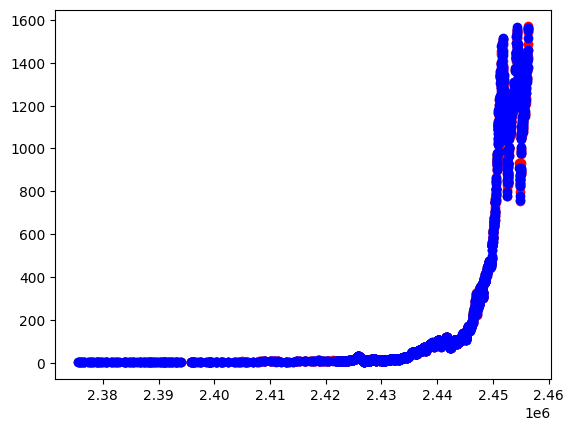

In [372]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(x_test.Date, y_test, color ='r')
plt.scatter(x_test.Date, y_predict, color ='b')
plt.show()

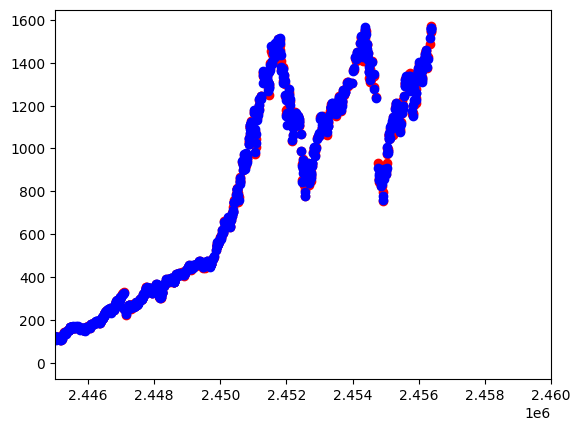

In [373]:
plt.xlim(2445000,2460000)
plt.scatter(x_test.Date, y_test, color ='r')
plt.scatter(x_test.Date, y_predict, color ='b')
plt.show()

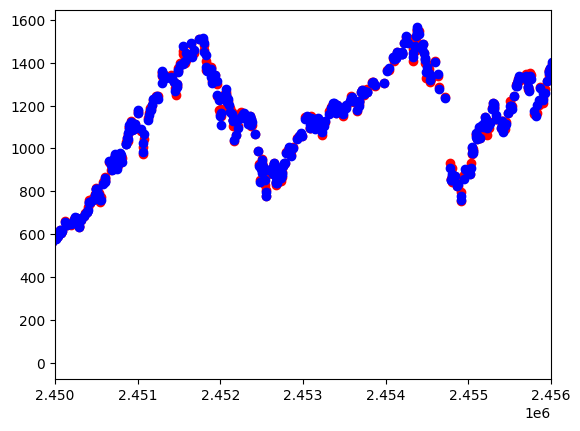

In [374]:
plt.xlim(2450000,2456000)
plt.scatter(x_test.Date, y_test, color ='r')
plt.scatter(x_test.Date, y_predict, color ='b')
plt.show()